# Annual Percentage Yield (APY)

Rates
- https://www.gecu.com/rates
- https://www.wellsfargo.com/savings-cds/rates/
- https://www.discover.com/online-banking/savings-account/

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import datetime

In [23]:
def apy_monthly_interest_earned(account_type,apy_rate,principal,monthly_contributions):
    '''
    returns: 
     - a dataframe populated with the monthly interest earned payouts
     - apy_monthly_return = principal*(apy_percent/len(year))

    assumes:
     - monthly compounded interest.
     - fixed APY percentage 
     - 1 year timespan
    '''
    year = ['January','February','March','April','May','June','July','August','September','October','November','December']
    apy_df =  pd.DataFrame(columns=['Month',
                                    'APY',
                                    'Deposit',
                                    'InterestEarned'
                                     ])
    # for each month calculated the interest earned 
    for month in year:
        apy_percent = apy_rate/100
        interest_earned = (principal)*(apy_percent/len(year))
        principal += (interest_earned + monthly_contributions)
        df_new_row = pd.DataFrame({ 
                                    'Month':[month],
                                    'APY':[apy_rate],
                                    'Deposit':[round(principal,2)],
                                    'InterestEarned':[round(interest_earned,2)]
                                    })
        apy_df = pd.concat([apy_df, df_new_row],ignore_index=True)

    total_interest_earned = np.around(np.sum(np.array(apy_df['InterestEarned'])),2)

    print(f'--------------------------------{account_type}---------------------------')
    print(apy_df)
    print('===========================================================================')
    print(f'Total interest earned after 1 year in {account_type}: ${total_interest_earned}')
    print('===========================================================================')
    print('------------------------------------------------------------------------\n')
    print('')

    return  apy_df, total_interest_earned

--------------------------------Cash Savings---------------------------
        Month  APY   Deposit  InterestEarned
0     January  0.0  100000.0             0.0
1    February  0.0  100000.0             0.0
2       March  0.0  100000.0             0.0
3       April  0.0  100000.0             0.0
4         May  0.0  100000.0             0.0
5        June  0.0  100000.0             0.0
6        July  0.0  100000.0             0.0
7      August  0.0  100000.0             0.0
8   September  0.0  100000.0             0.0
9     October  0.0  100000.0             0.0
10   November  0.0  100000.0             0.0
11   December  0.0  100000.0             0.0
Total interest earned after 1 year in Cash Savings: $0.0
------------------------------------------------------------------------


--------------------------------GECU Savings Account---------------------------
        Month   APY    Deposit  InterestEarned
0     January  0.15  100012.50           12.50
1    February  0.15  100025.00       

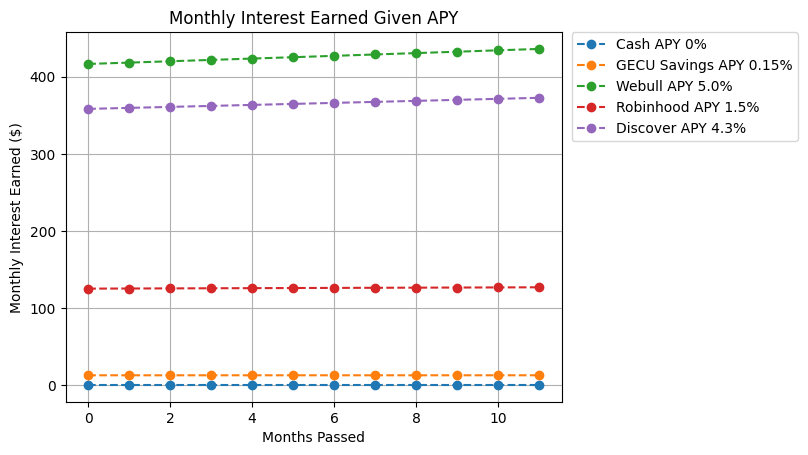

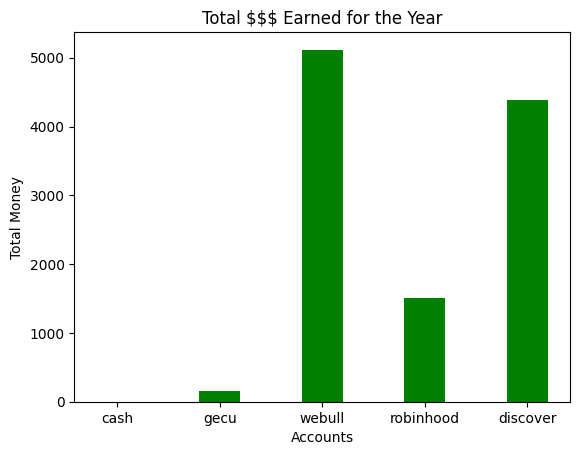

In [24]:
initial_deposit = 100000
monthly_deposit = 0

# now = datetime.datetime.now()
# print(now)

cash_savings_df, cash_total = apy_monthly_interest_earned('Cash Savings',apy_rate=0.0,principal=initial_deposit,monthly_contributions=monthly_deposit)
GECU_savings_df, gecu_total = apy_monthly_interest_earned('GECU Savings Account',apy_rate=0.15,principal=initial_deposit,monthly_contributions=0)
webull_savings_df, webull_total = apy_monthly_interest_earned('Wellbull Savings Account',apy_rate=5.0,principal=initial_deposit,monthly_contributions=monthly_deposit)
robinhood_savings_df, robinhood_total = apy_monthly_interest_earned('Robinhood Savings Account',apy_rate=1.5,principal=initial_deposit,monthly_contributions=monthly_deposit)
discover_savings_df, discover_total = apy_monthly_interest_earned('Discover Savings Account',apy_rate=4.3,principal=initial_deposit,monthly_contributions=monthly_deposit)
# wellsfargo_savings_df = apy_monthly_interest_earned('WellsFargo way2save Savings Account',apy_rate=0.15,principal=300,monthly_contributions=monthly_deposit)
# wellsfargo_cd_df = apy_monthly_interest_earned('WellsFargo CD',apy_rate=2.5,principal=initial_deposit,monthly_contributions=monthly_deposit)

totals =  [cash_total, gecu_total, webull_total, robinhood_total,discover_total]
account = ['cash', 'gecu', 'webull', 'robinhood','discover']
plt.title('Monthly Interest Earned Given APY')
plt.plot(np.array(cash_savings_df['InterestEarned']),linestyle='--', marker='o', label="Cash APY 0%")
plt.plot(np.array(GECU_savings_df['InterestEarned']),linestyle='--', marker='o', label="GECU Savings APY 0.15%")
plt.plot(np.array(webull_savings_df['InterestEarned']),linestyle='--', marker='o', label="Webull APY 5.0%")
plt.plot(np.array(robinhood_savings_df['InterestEarned']),linestyle='--', marker='o', label="Robinhood APY 1.5%")
plt.plot(np.array(discover_savings_df['InterestEarned']),linestyle='--', marker='o', label="Discover APY 4.3%")
# plt.plot(np.array(wellsfargo_savings_df['InterestEarned']), linestyle='--', marker='o',label="WellsFargo Savings APY 0.15%")
# plt.plot(np.array(wellsfargo_cd_df['InterestEarned']), linestyle='--', marker='o',label="WellsFargo CD")
plt.ylabel('Monthly Interest Earned ($)')
plt.xlabel('Months Passed')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# creating the bar plot
plt.bar(account, totals, color ='green',
        width = 0.4)
 
plt.xlabel("Accounts")
plt.ylabel("Total Money")
plt.title("Total $$$ Earned for the Year")
plt.show()

# ##################################################
# deposit = 500
# wells_df = apy_monthly_return('WellsFargo way2save Savings Account',apy_rate=0.15,principal=deposit)
# robinhood_df = apy_monthly_return('Robinhood',apy_rate=1.5,principal=deposit)
# webull_df = apy_monthly_return('Webull',apy_rate=5.0,principal=deposit)